# Week 8 - Latent Variable Models
For this week's assignment, you will implement a Gaussian Mixture Model and perform Factor Analysis

In [1]:
from sklearn import cluster, datasets
import numpy as np
import pandas as pd

## Task 1. Load the Old Faithful dataset (1 pt)
For this assignment, we will be working with the Old Faithful dataset. Old Faithful is a geyser that is found in Yellowstone National Park, Wyoming and is the park's most famous attraction. We will be working with a dataset from 1990 that recorded the time between eruptions and the duration of the eruption, both taken in minutes. There are 272 observations in total.

We have provided the url to the dataset below. Use the pandas `read_csv()` function to read in the data. 

**NOTE:** you may want to use the `skipinitialspace` argument to properly load the header. 

In [2]:
# URL for the dataset
url = "https://raw.githubusercontent.com/barneygovan/from-data-with-love/master/data/faithful.csv"

# YOUR CODE HERE
data = pd.read_csv(url, skipinitialspace=True)
data.columns

Index(['eruptions', 'waiting'], dtype='object')

In [3]:
assert data.shape == (272, 2)

## Task 2: Visualize the data (1 pt)
Let's get a sense of what our data look like by plotting the distribution of eruption times and waiting times, as well as a scatter plot of both dimensions.
<ol>
    <li>A histogram of the eruption time (the column labeled "eruptions").</li>
    <li>A histogram of the waiting time between eruptions.</li>
    <li>A scatter plot of both features</li>
</ol>

Text(0,0.5,'waiting')

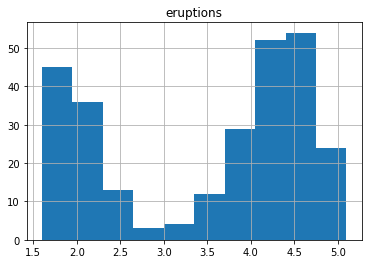

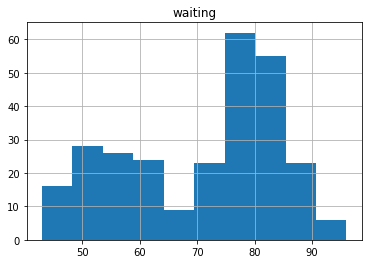

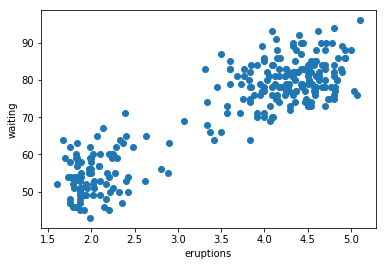

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# YOUR CODE HERE

data.hist(column="eruptions")
data.hist(column="waiting")
plt.figure()
plt.scatter(data["eruptions"], data["waiting"])
plt.xlabel("eruptions")
plt.ylabel("waiting")

## Task 3: Build a GMM (1 pt)
Each feature seems to be bimodally distributes and the scatterplot clearly shows separation of two clusters. 
<ol>
    <li> Using sklearn's `GaussianMixture` implementation, build a Gaussian Mixture Model with 2 Gaussians. Save the result in a variable named `gmm` <br>
**Note:** In order for our assertions to work, make sure you use the default parameters for `GaussianMixture`, with the exception of random_state, which you should set to 126
    </li>
    <li> Annotate each datapoint using the `.predict` function 
    <li> Then create a scatterplot of eruption time versus waiting time in which each point is colored based on its prediction from the GMM</li>
</ol>



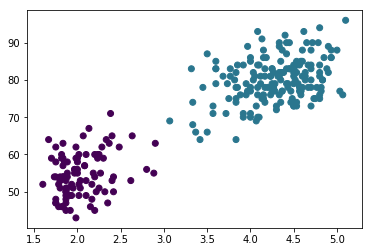

In [5]:
from sklearn import mixture
import matplotlib.cm as cm

gmm = mixture.GaussianMixture(n_components=2, random_state=126)
gmm.fit(data)
labels = gmm.predict(data)

plt.scatter(data["eruptions"], data["waiting"], color=cm.viridis(labels*100))

In [6]:
assert labels.shape == (272,)
assert np.isclose(np.mean(labels), .64, .1)

## Task 4: Choosing K (ungraded)
As discussed in lecture, the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) provide quantitative ways to choose the number of clusters that maximize the likelihood of our data while penalizing for increased complexity. Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these.

Let's look at the AIC and BIC as a function as the number of GMM components for our dataset. Run the cell below to visualize the AIC and BIC metrics for 10 different models.  

The optimal number of clusters is the value that minimizes the AIC or BIC. We can see from both of these measures that 2 seemed to be the right choice!

## Task 5: Factor Analysis (1 pt)
Factor analysis is useful technique for reducing dimensionality of data. It assumes that multiple observed variables have similar patterns of responses because they are all associated with a latent variable. 

Consumers (n = 99) rate on a scale of 0-100 how important they consider each of seven qualities when deciding whether
or not to buy a 6-pack of beer: cost, volume, alcohol percentage, brewery reputation, the color, aroma, and taste. 

In future lectures, we will discuss how to go about choosing the right number of latent variables to use. However, for this assignment, we will perform factor analysis using 2 latent variables to see whether this data can be represented in 2 dimensions. 

Steps:
<ol>
    <li> Normalize the beer data using sklearn's `scale` function </li>
    <li> Perform Factor Analysis using 2 components. Save the resulting model using the variable name `fa`</li>
    <li> Observe the factor loadings, which you can access via the model's attribute `components_`. </li>
    <li> (Optional) Visualize the factor loadings for each latent variable using a bar chart </li>
</ol>

**Note:** In order for our assertions to work, make sure you use the default parameters for GaussianMixture, with the exception of random_state, which you should set to 126

In [7]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale

beer = pd.read_csv("beer.txt", sep="\t", dtype=np.float64)

beer = scale(beer)
fa = FactorAnalysis(n_components=2)
fa.fit(beer)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [8]:
assert np.isclose(np.sum(fa.components_), -.618, .1)
assert fa.components_.shape == (2, 6)